<a href="https://colab.research.google.com/github/PanciSaigo/PytorchRookie/blob/main/Eser-01_di_Feedforward_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks and Deep Learning

---

## Lecture 1: Feedforward Neural Networks

### 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Lecture 1

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive/My Drive/[2024-2025] AN2DL/Lecture 1'
/content


### ⚙️ Import Libraries

In [ ]:
# Fix randomness and hide warnings
seed = 42   # we need this for reproducibility this guarantee that your experiments will be the same every time you execute

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


### ⏳ Load Data

In [ ]:
# Load the Iris dataset into a variable called 'data'
data = load_iris()

# Print the description of the Iris dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png" width="800">

### 🔎 Inspect Data

In [ ]:
# Create a DataFrame 'iris_dataset' from the Iris dataset
iris_dataset = pd.DataFrame(data.data, columns=data.feature_names)
print('Iris dataset shape', iris_dataset.shape) #150rows and 4 columns and 90% error is due to tensor's shape

# Display the first 10 rows of the Iris dataset
iris_dataset.head(10)

Iris dataset shape (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# Print the shape of the Iris dataset
print('Iris dataset shape', iris_dataset.shape)

# Generate summary statistics for the Iris dataset
iris_dataset.describe()

Iris dataset shape (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Get the target values from the Iris dataset
target = data.target
print('Target shape', target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples') #this set of classes is not ordinary, class 2 is not bigger than class 0
                                                        # so i need to treat the problem not as regression but as classification

Target shape (150,)
Target labels: [0 1 2]
Class 0 has 50 samples
Class 1 has 50 samples
Class 2 has 50 samples


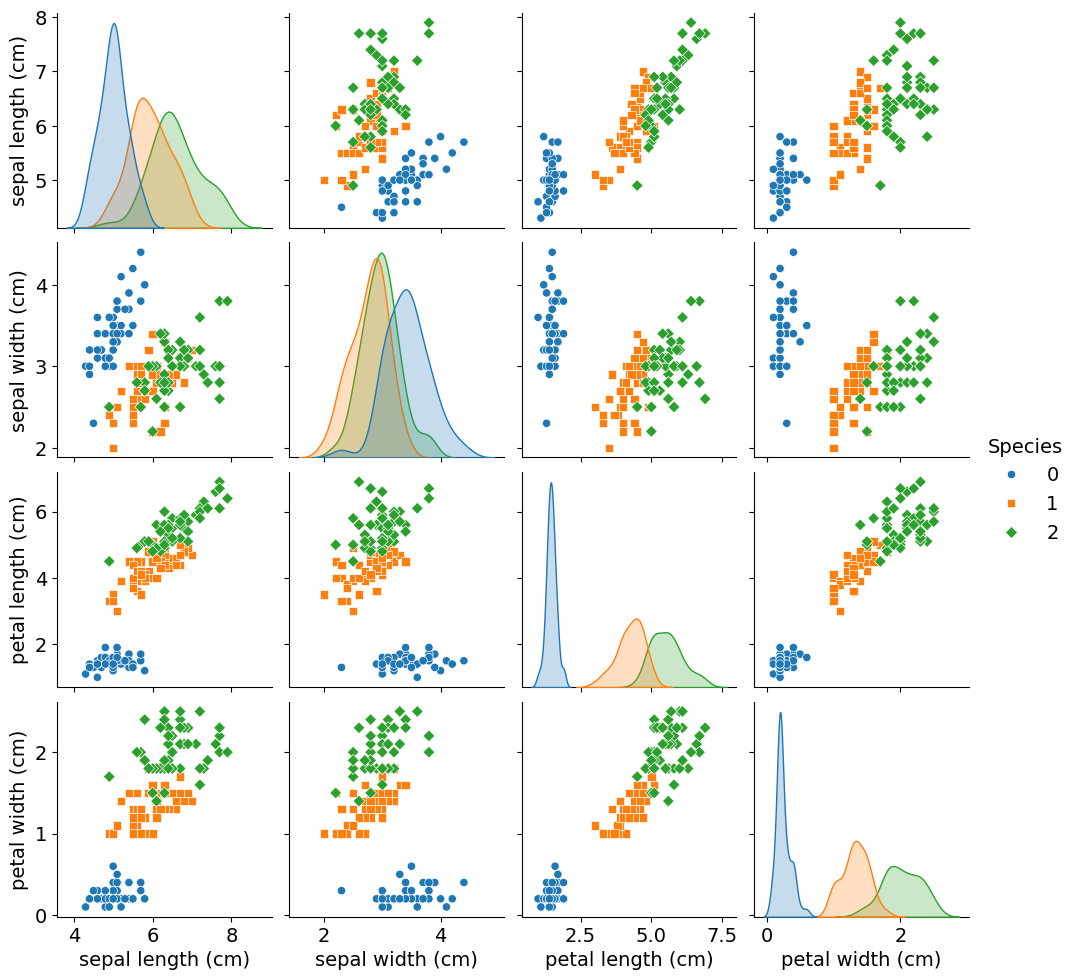

In [ ]:
# Copy the iris dataset
plot_dataset = iris_dataset.copy()

# Assign target labels to the dataset
plot_dataset["Species"] = target

# Plot using seaborn pairplot
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"])
plt.show()

# Clean up by deleting the temporary dataset
del plot_dataset

if we put all the data in the model
without external dataset we cannot evaluate our model on what is the real goal of the training the problem here is about generalization  

so we SPLIT the data into two parts, the first one training the second one and a validation set to be used during the training just for evaluation scope ( the performance ),
at the end od my training I have to make the final evaluation on the test.

#### Split in train, validation and test

In [ ]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    iris_dataset,
    target,
    test_size=20,
    random_state=seed,
    stratify=target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=20,
    random_state=seed,
    stratify=y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

Training set shape:	 (110, 4) (110,)
Validation set shape:	 (20, 4) (20,)
Test set shape:		 (20, 4) (20,)


### 🔄 Process Data

min max scaling
(we also have normal scaling or standard scaling)

why we are only taking max min from training set
1. Prevention of Data Leakage

Using statistics from the entire dataset, including the test set, introduces data leakage. This means that during training, the model gains access to information from the test set, which it should not have. The test set is meant to simulate unseen data that the model will encounter in the real world, so its values shouldn't influence any part of the model's training process.
If the scaling includes values from the test set, the model indirectly "sees" those values, leading to overly optimistic performance evaluations.

In [ ]:
# Compute maximum values for each feature
max_df = X_train.max() # I'm taking the max and min only from training set why?
                       # Cascade of estimation
                       # so we re using the statistics from train set for normalizing everything

# Display maximum values
print('Iris dataset maximum values')
print(max_df)

# Compute minimum values for each feature
min_df = X_train.min()

# Display minimum values
print('\nIris dataset minimum values')
print(min_df)

Iris dataset maximum values
sepal length (cm)    7.7
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Iris dataset minimum values
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64


In [ ]:
# Normalise training data
X_train = (X_train - min_df) / (max_df - min_df)

# Normalise validation data
X_val = (X_val - min_df) / (max_df - min_df)

# Normalise test data
X_test = (X_test - min_df) / (max_df - min_df)

In [ ]:
# Display summary statistics of the normalised training data
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,110.000000,110.000000,110.000000,110.000000
mean,-1.130151,-0.649148,-0.090021,0.150568
std,0.072058,0.076279,0.050963,0.132254
min,-1.264706,-0.833333,-0.169492,-0.041667
25%,-1.195502,-0.694444,-0.152255,-0.002604
50%,-1.134948,-0.659722,-0.073255,0.166667
75%,-1.083045,-0.607639,-0.051709,0.253472
max,-0.970588,-0.416667,0.000000,0.375000


why this one-hot encoding?

we applying this transformation, because of our output layer of the network
we want to have the most from our prediction

1. Compatibility with Loss Functions

In many classification problems, particularly multiclass classification, one-hot encoding is essential for making the labels compatible with the loss function used during training. For example, the commonly used loss function categorical cross-entropy expects the target labels to be provided in a one-hot encoded format.

One-hot encoding transforms a label into a vector of 0s and 1s, where the position corresponding to the class is marked as 1, and all other positions are 0. This format allows the model to compare its probability distribution output (from the softmax layer) to the one-hot encoded target vector.
Example: For a 3-class problem:

* Label 0 → [1, 0, 0]
* Label 1 → [0, 1, 0]
* Label 2 → [0, 0, 1]

This format is necessary for correctly calculating the error and optimizing the model.

In [ ]:
# Apply one-hot encoding to training labels
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))

# Apply one-hot encoding to validation labels
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))

# Apply one-hot encoding to test labels
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

# Display shapes of the encoded label sets
print('Training set target shape:\t', y_train.shape)
print('Validation set target shape:\t', y_val.shape)
print('Test set target shape:\t\t', y_test.shape)

Training set target shape:	 (110, 3)
Validation set target shape:	 (20, 3)
Test set target shape:		 (20, 3)


**keep it in mind**

we are not interested in the number of samples.

we have interested only into dimensions of our data.


In [ ]:
# Determine the input shape, corresponding to the number of features
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape, corresponding to the number of classes
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (4,)
Output shape of the network 3


### 🧮 Define Network Parameters

In [ ]:
# Batch size: number of samples processed in each training iteration
batch_size = 16

# Number of epochs: times the entire dataset is passed through the network during training
epochs = 500

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

what if our last sample is a outlier?

it will adjust our weights

### 🛠️ Build the Model

In [ ]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    # Add hidden layer with ReLU activation
    x = tfkl.Dense(units=16, name='Hidden')(inputs)
    x = tfkl.Activation('relu', name='HiddenActivation')(x)

    # Add output layer with softmax activation
    x = tfkl.Dense(units=output_shape, name='Output')(x)
    outputs = tfkl.Activation('softmax', name='Softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='FeedforwardNeuralNetwork')

    # Compile the model with loss, optimizer, and metrics
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

**softmax avtivation function**
A soft max activation function is like a sigmoid activation function so like a "s" that is able to map values from 0 to 1, according to the domain, but it is normalized. so the sum of predictions will be equal to 1(as probabilities)

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 4)                    │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Hidden (Dense)                      │ (None, 16)                   │            80 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenActivation (Activation)       │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 3)                    │            51 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Softmax (Activation)                │ (None, 3)                    │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

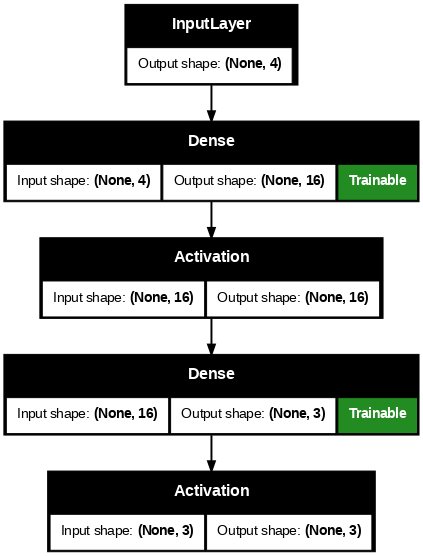

In [ ]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the Model

In [ ]:
# Train the model and store the training history
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
).history

# Calculate the final validation accuracy
final_val_accuracy = round(history['val_accuracy'][-1] * 100, 2)

# Save the trained model to a file with the accuracy included in the filename
model_filename = f'Iris_Feedforward_{final_val_accuracy}.keras'
model.save(model_filename)

# Delete the model to free up memory resources
del model

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3153 - loss: 1.1340 - val_accuracy: 0.3000 - val_loss: 1.1273
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3153 - loss: 1.1229 - val_accuracy: 0.3000 - val_loss: 1.1174
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3153 - loss: 1.1137 - val_accuracy: 0.3000 - val_loss: 1.1083
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3153 - loss: 1.1055 - val_accuracy: 0.3000 - val_loss: 1.1001
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3153 - loss: 1.0982 - val_accuracy: 0.3000 - val_loss: 1.0926
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3176 - loss: 1.0918 - val_accuracy: 0.3000 - val_loss: 1.0861
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3292 - loss: 1.0859 - val_accuracy: 0.4500 - val_loss: 1.0801
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4816 - loss: 1.0804 - val_accuracy: 0.6500 - val_loss: 1

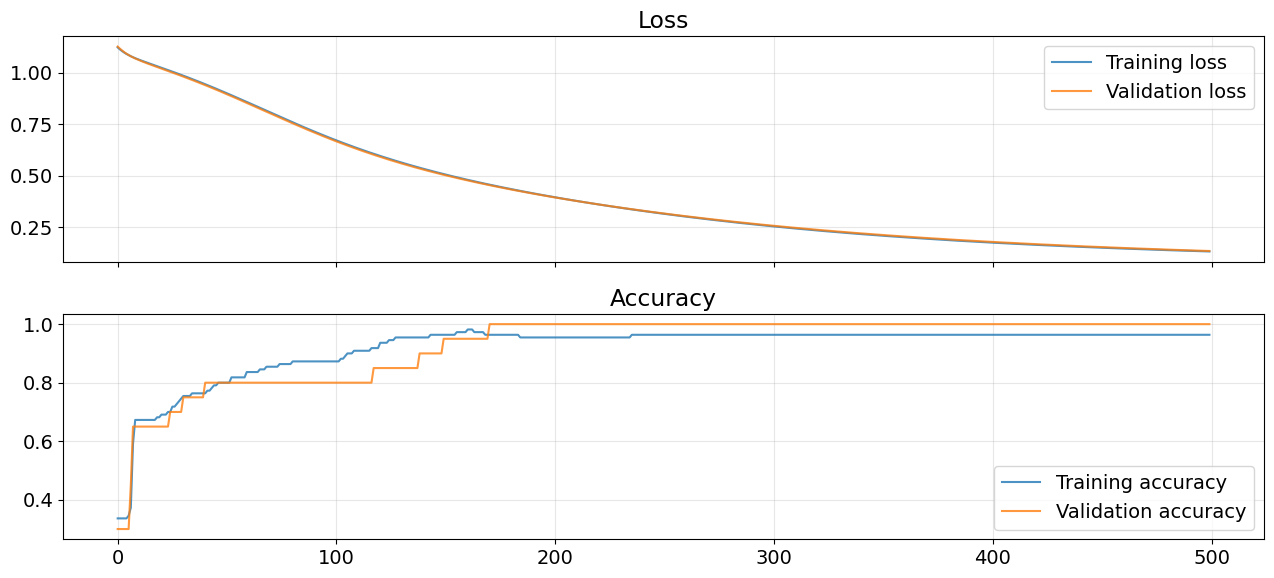

In [ ]:
# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)

# Plot training and validation loss
ax1.plot(history['loss'], label='Training loss', alpha=.8)
ax1.plot(history['val_loss'], label='Validation loss', alpha=.8)
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=.3)

# Plot training and validation accuracy
ax2.plot(history['accuracy'], label='Training accuracy', alpha=.8)
ax2.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
ax2.set_title('Accuracy')
ax2.legend()
ax2.grid(alpha=.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

### 🕹️ Use the Model - Make Inference

**Binary Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1dUVBtRp6yJmfr1-cwUmWtKX2UfgozNaj" width="250"/>

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

&nbsp;

---

**Multiclass Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1yDfrbcjHPTqFx9P5ZPhi07S5XVcXjd6g" width="300"/>

$\text{Accuracy} = \sum_{i=1}^{N} \frac{TP_i}{TP_i + TN_i + FP_i + FN_i}$

$\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}$

$\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}$

$F1_i = 2 \cdot \frac{\text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$

&nbsp;

**Macro Averaging**

$\text{Precision}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_i$

$\text{Recall}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_i$

$F1_{macro} = \frac{1}{N} \sum_{i=1}^{N} F1_i$

&nbsp;

**Weighted Macro Averaging**

$\text{Precision}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Precision}_i \right)$

$\text{Recall}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Recall}_i \right)$

$F1_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times F1_i \right)$


In [ ]:
# Load the saved model
model = tfk.models.load_model('Iris_Feedforward_95.0.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

ValueError: File not found: filepath=Iris_Feedforward_95.0.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# Predict class probabilities and get predicted classes
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)  # I want the number of the class (opposite of one hot encoding)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
|# Predict class probabilities and get predicted classes
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_gt, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_gt, test_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

### 📜 TODO Exercise
Perform the same classification analysis on the Penguins dataset to predict the correct species

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="800">

```
...

# Load Data
os.environ["DATASET_NAME"] = "penguins.csv"
os.environ["DATASET_URL"] = "1qn1P6_KW08wGRfSkTlzBoDCyVb18T3Lk"
if not os.path.exists(os.environ["DATASET_NAME"]):
    print("Downloading data...")
    ! gdown -q ${DATASET_URL}
    print("Download completed")
else:
    print("Data already downloaded. Using cached data...")
dataset = pd.read_csv('penguins.csv')

# Inspect Data
...

# Process Data
...


# Build the Model
...

# Train the Model
...

# Use the Model - Make Inferece
...

```



#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Eugenio Lomurno 📧 eugenio.lomurno@polimi.it





```
   Copyright 2024 Eugenio Lomurno

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```
